In [1]:
#pip install yfinance

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


Pagina:
https://www.mlq.ai/capital-asset-pricing-model-python/

Calulo de beta:
https://towardsai.net/p/l/capital-assets-pricing-model-capm%E2%80%8A-%E2%80%8Ausing-python

#Introduccion

Librerias:

* **yfinance:** es una biblioteca del ámbito financiero y de análisis de datos en Python debido a su facilidad de uso y a la gran cantidad de datos que proporciona.
* **pandas-datareader:** Una extensión de pandas que proporciona una interfaz para acceder a diversas fuentes de datos financieros, incluidas Yahoo Finance, Google Finance, Quandl y otras fuentes.

* **numpy-financial:** Ofrece funciones financieras para el cálculo de diversos indicadores financieros, como el valor presente neto (VPN), la tasa interna de retorno (TIR), entre otros.

* **pyfolio:** Se utiliza para realizar análisis de cartera y evaluar el rendimiento de estrategias de inversión.

* **ta-lib (Technical Analysis Library):** Proporciona funciones para realizar análisis técnico en datos financieros, como la creación de indicadores técnicos y análisis de patrones de precios.

* **empyrical:** Ofrece herramientas para medir y comparar el rendimiento de estrategias de inversión, incluyendo métricas como la relación de Sharpe y el índice de información.

* **quandl:** Proporciona acceso a una amplia gama de datos financieros, incluidos datos de precios de acciones, futuros, opciones, índices y mucho más.

* **alpha_vantage:** Proporciona una API gratuita para acceder a datos de precios históricos y en tiempo real de acciones, incluida Apple. Solo necesitas obtener una clave API gratuita para acceder a los datos.


Videos:

* **Como usar alpha_vantage**: https://www.youtube.com/watch?v=PytQROAncxg

# 1 Activo

In [75]:
import yfinance as yf
import numpy as np

# Símbolo de la acción de Apple
simbolo_aapl = "AAPL"

# Obtener datos históricos de precios de Apple
datos_aapl = yf.download(simbolo_aapl, start="2020-01-01", end="2023-01-01")

# Calcular la rentabilidad diaria de Apple
datos_aapl["Rentabilidad"] = datos_aapl["Close"].pct_change()

# Calcular el rendimiento esperado anual de Apple
rendimiento_anual = datos_aapl["Rentabilidad"].mean() * 252  # 252 días hábiles en un año

# Calcular la volatilidad diaria (riesgo) de Apple
volatilidad_diaria = datos_aapl["Rentabilidad"].std()

# Calcular la volatilidad anualizada (riesgo) de Apple
volatilidad_anualizada = volatilidad_diaria * np.sqrt(252)

print("Rendimiento anual de Apple:", rendimiento_anual)
print("Volatilidad anualizada de Apple:", volatilidad_anualizada)
print('Volatilidad diaria de apple: ',volatilidad_diaria)


[*********************100%%**********************]  1 of 1 completed
Rendimiento anual de Apple: 0.25116664737823563
Volatilidad anualizada de Apple: 0.36937411462675057
Volatilidad diaria de apple:  0.023268382096358276


In [4]:
volatilidad_diaria

0.023268382096358276

In [5]:
import yfinance as yf
import numpy as np

# Símbolo de la acción de Apple
simbolo_aapl = "AAPL"

# Obtener datos históricos de precios de Apple
datos_aapl = yf.download(simbolo_aapl, start="2022-01-01", end="2023-01-01") # auto_adjust=True quita la columna adj close

# Calcular la rentabilidad diaria de Apple
datos_aapl["Rentabilidad"] = datos_aapl["Adj Close"].pct_change()
datos_aapl

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Rentabilidad
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190964,104487900,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400,-0.012692
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171844,94537600,-0.026600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281021,96904000,-0.016693
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449326,86709100,0.000988
...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900,-0.002798
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477600,69007800,-0.013878
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400,-0.030685


In [43]:
# Calcular el rendimiento esperado anual de Apple
rendimiento_anual = datos_aapl["Rentabilidad"].mean() * 252  # 252 días hábiles en un año
print('Rendimiento anual :',rendimiento_anual)

Rendimiento anual : 0.25116664737823563


In [44]:
# Calcular la volatilidad diaria (riesgo) de Apple
volatilidad_diaria = datos_aapl["Rentabilidad"].std()
print('Volatilidad diaria: ',volatilidad_diaria)

Volatilidad diaria:  0.023268382096358276


In [45]:
# Calcular la volatilidad anualizada (riesgo) de Apple
volatilidad_anualizada = volatilidad_diaria * np.sqrt(252)
print('Volatilidad anual: ',volatilidad_anualizada)

Volatilidad anual:  0.36937411462675057


In [46]:
rentabilidad_anualizada = (1 + datos_aapl["Rentabilidad"]).prod() - 1 # prod(): metodo de pandas que multiplica entre si todos los valores de la serie
print('Rentabilidad anual: ',rentabilidad_anualizada)

Rentabilidad anual:  0.7303810892016525


## Rendimientos y riesgos por año

In [77]:
import yfinance as yf
import pandas as pd
data_appl = yf.download('AAPL', start='2000-01-01', end='2023-01-01')
data_appl['Rentabilidad_diaria'] = data_appl['Adj Close'].pct_change().dropna() # rendimientos diarios y eliminar el 1er null que se forma

rendimientos_por_anio = data_appl['Rentabilidad_diaria'].groupby(data_appl.index.year).mean()
volatilidad_por_anio = data_appl['Rentabilidad_diaria'].groupby(data_appl.index.year).std()
print('Volatidad y rendimiento anuales: \n')
#pd.DataFrame(volatilidad_por_anio)
resumen = pd.concat([volatilidad_por_anio,rendimientos_por_anio], axis=1, keys=['Volatilidad', 'Rentabilidad'])
resumen

[*********************100%%**********************]  1 of 1 completed
Volatidad y rendimiento anuales: 



,Volatilidad,Rentabilidad
Date,,
2000,0.054940,-0.003457
2001,0.039338,0.002329
2002,0.030526,-0.001212
2003,0.023360,0.001857
2004,0.025470,0.004702
2005,0.024478,0.003490
2006,0.024265,0.000949
2007,0.023757,0.003664
2008,0.036666,-0.002646


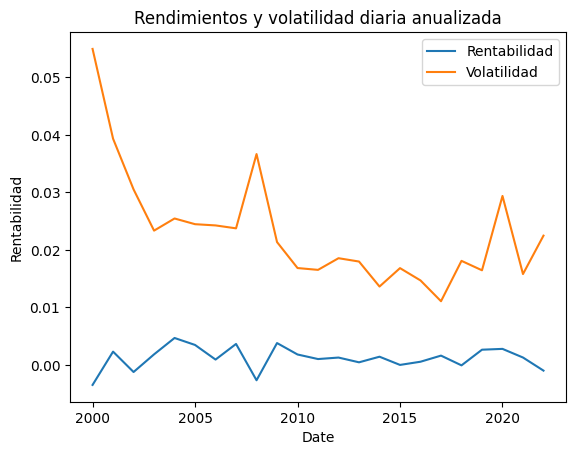

In [74]:
plt.figure()
plt.title('Rendimientos y volatilidad diaria anualizada')
sb.lineplot(data=resumen, x='Date', y='Rentabilidad', label='Rentabilidad')
sb.lineplot(data=resumen, x='Date', y='Volatilidad', label='Volatilidad')
plt.legend()


In [12]:
apple  = yf.download('AAPL',start='2018-01-01', end='2023-01-01')
apple['rentabilidad'] = apple['Adj Close'].pct_change().dropna()
print('Rentabilidad año 2020:', apple['rentabilidad'].mean())                     # Rentabilidad diaria (expresado en decimales, no porcentaje)
print('Rentabilidad año 2020:', apple['rentabilidad'].mean()*100,'%')                 # Rentabilidad en porcentaje
print('Volatilidad(desviacion estandar) año 2020:', apple['rentabilidad'].std())  # Riesgo diario    (no está representado en porcentaje)

[*********************100%%**********************]  1 of 1 completed
Rentabilidad año 2020: 0.0011407193262691732
Rentabilidad año 2020: 0.11407193262691732 %
Volatilidad(desviacion estandar) año 2020: 0.02109359537258831


# Portafolio 2 activos

In [13]:
import pandas as pd
import numpy as np

# Datos históricos de los precios de los dos activos
datos = {
    'Activo1': [100, 105, 110, 115, 120],
    'Activo2': [80, 85, 90, 95, 100]
}

In [14]:
# Convertir los datos en un DataFrame de Pandas
df = pd.DataFrame(datos)
df

,Activo1,Activo2
0,100,80
1,105,85
2,110,90
3,115,95
4,120,100


In [15]:
# Calcular los rendimientos diarios de los activos
rendimientos_diarios = df.pct_change()
rendimientos_diarios

,Activo1,Activo2
0,NaN,NaN
1,0.050000,0.062500
2,0.047619,0.058824
3,0.045455,0.055556
4,0.043478,0.052632


In [16]:
# Calcular los rendimientos anuales promedio de los activos
rendimiento_anual = rendimientos_diarios.mean() * 252
rendimiento_anual

Activo1    11.752767
Activo2    14.459172
dtype: float64

In [17]:
# Calcular la matriz de covarianza anual
matriz_covarianza = rendimientos_diarios.cov() * 252
matriz_covarianza

,Activo1,Activo2
Activo1,0.001987,0.003007
Activo2,0.003007,0.004551


In [18]:
# Definir los pesos del portafolio (por ejemplo, 50% para cada activo)
pesos = np.array([0.5, 0.5])

# Calcular el rendimiento del portafolio
rendimiento_portafolio = np.dot(rendimiento_anual, pesos)

# Calcular el riesgo del portafolio
riesgo_portafolio = np.sqrt(np.dot(pesos.T, np.dot(matriz_covarianza, pesos)))

print("Rendimiento anual del portafolio:", rendimiento_portafolio)
print("Riesgo anual del portafolio:", riesgo_portafolio)

Rendimiento anual del portafolio: 13.10596931252218
Riesgo anual del portafolio: 0.05601424739667846


# Acceder a yahoo finance


In [19]:
import yfinance as yf

# Lista de símbolos de acciones
acciones = ["MSFT", "AAPL", "AMZN"]

# Obtener los datos de rendimientos diarios de las acciones
datos = yf.download(acciones, start="2022-01-01", end="2022-12-31")["Adj Close"]

datos.head()


[*********************100%%**********************]  3 of 3 completed


,AAPL,AMZN,MSFT
Date,,,
2022-01-03,180.190964,170.404495,329.394897
2022-01-04,177.904053,167.522003,323.746674
2022-01-05,173.171829,164.356995,311.318756
2022-01-06,170.281006,163.253998,308.858734
2022-01-07,170.449341,162.554001,309.016144


## Obtener datos

In [20]:
import yfinance as yf

# Símbolo de la acción que deseas obtener
simbolo = "AAPL"

# Obtener datos históricos de precios de cierre de Apple desde el 1 de enero de 2021 hasta el 31 de diciembre de 2021
datos = yf.download(simbolo, start="2021-01-01", end="2024-01-01",
                    period='1y',    # ESPACIO TEMPORAL TOTAL QUE QUIERO, SE LE DA PRIORIDAD AL START Y END
                    interval='1mo',   # mostrar dato cada cuanto tiempo: "1d" (diario), "1mo" (mensual), "1y" (anual), etc.
                    actions=True,    # Introducir eventos corporativos: dividendos, stock splits
                    #auto_adjust=False, # Muestra adj close, False(default)
                    #threads=2,  # hilos para descargar datos
                    progress=False    # Eliminar barra de progreso de descarga
                    )

# OTRA FORMA:
#datos = yf.Ticker(simbolo).history(period="1y", auto_adjust=True)

datos.head()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2021-01-01,133.520004,145.089996,126.379997,131.960007,129.840759,2240262000,0.000,0.0
2021-02-01,133.750000,137.880005,118.389999,121.260002,119.312584,1833855600,0.205,0.0
2021-03-01,123.750000,128.720001,116.209999,122.150002,120.367889,2650418200,0.000,0.0
2021-04-01,123.660004,137.070007,122.489998,131.460007,129.542068,1889857500,0.000,0.0
2021-05-01,132.039993,134.070007,122.250000,124.610001,122.791985,1711934900,0.220,0.0


## Obtener informacion de activo

In [21]:
import yfinance as yf

# Símbolo de la acción que deseas obtener
simbolo = "AAPL"

# Obtener información detallada de Apple
info = yf.Ticker(simbolo)
info.info   # NO AUTORIZADO

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as App

## Obtener Dividendos

In [22]:
import yfinance as yf

# Símbolo de la acción que deseas obtener
simbolo = "AAPL"

# Obtener dividendos de Apple
dividendos = yf.Ticker(simbolo).dividends
pd.DataFrame(dividendos.sample(10))

,Dividends
Date,
1992-06-01 00:00:00-04:00,0.001071
2022-05-06 00:00:00-04:00,0.230000
1992-11-30 00:00:00-05:00,0.001071
1994-11-18 00:00:00-05:00,0.001071
1993-02-12 00:00:00-05:00,0.001071
1995-02-13 00:00:00-05:00,0.001071
1989-11-17 00:00:00-05:00,0.000982
2013-05-09 00:00:00-04:00,0.108929
2018-08-10 00:00:00-04:00,0.182500


In [23]:
# Obtener información de dividendos de Apple
info_dividendos = yf.Ticker(simbolo).dividends.info()
info_dividendos

<class 'pandas.core.series.Series'>
DatetimeIndex: 80 entries, 1987-05-11 00:00:00-04:00 to 2023-08-11 00:00:00-04:00
Series name: Dividends
Non-Null Count  Dtype  
--------------  -----  
80 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


## Opciones

In [24]:
import yfinance as yf

# Símbolo de la acción que deseas obtener
simbolo = "AAPL"

# Obtener información de opciones de Apple
opciones = yf.Ticker(simbolo).options
opciones

('2023-09-01',
 '2023-09-08',
 '2023-09-15',
 '2023-09-22',
 '2023-09-29',
 '2023-10-06',
 '2023-10-20',
 '2023-11-17',
 '2023-12-15',
 '2024-01-19',
 '2024-02-16',
 '2024-03-15',
 '2024-04-19',
 '2024-06-21',
 '2024-09-20',
 '2024-12-20',
 '2025-01-17',
 '2025-06-20',
 '2025-12-19')

## Grafica 1 activo

In [25]:
import yfinance as yf
import plotly.graph_objects as go

# Símbolo de la acción que deseas graficar
simbolo = "AAPL"

# Obtener datos históricos de precios de cierre ajustados de Apple para el último año
datos = yf.Ticker(simbolo).history(period="1y", auto_adjust=True)

# Crear un gráfico interactivo con Plotly
fig = go.Figure()

# Agregar una serie de datos para los precios de cierre ajustados
fig.add_trace(go.Scatter(x=datos.index, y=datos['Close'], name='Precio de Cierre Ajustado'))

# Personalizar el diseño del gráfico
fig.update_layout(title=f'Gráfico interactivo de {simbolo}', xaxis_title='Fecha', yaxis_title='Precio de Cierre Ajustado')

# Mostrar el gráfico interactivo
fig.show()

In [26]:
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
import math
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.graph_objects as go #mejores graficos, entre ellas las velas japonesas
from scipy.stats import norm
import yfinance as yfin
yfin.pdr_override()

import plotly.express as px # grafica

In [82]:
tickers = ['NVDA','AAPL','MSFT','WMT','^GSPC']
#tickers = ['TSLA','AAPL','MSFT','NKE','AMZN','WMT','WBD','NVDA','GOOGL']
start_date = '2019-01-01' # el primer dia no lo toma en cuenta porque no tiene con cual realizar la variacion, AUN SIRVE PONIENDOLO COMO STRING
ende_date='2021-01-01'
data = pdr.get_data_yahoo(tickers,start_date,ende_date)['Adj Close']
data.tail()

[*********************100%%**********************]  5 of 5 completed


,AAPL,MSFT,NVDA,WMT,^GSPC
Date,,,,,
2020-12-24,129.850571,217.364548,129.667374,137.487106,3703.060059
2020-12-28,134.494797,219.521133,128.731827,139.135025,3735.360107
2020-12-29,132.704010,218.730713,129.163437,138.253586,3727.040039
2020-12-30,131.572479,216.320419,131.184219,138.138626,3732.040039
2020-12-31,130.559021,217.042496,130.278625,138.109863,3756.070068


In [28]:
#data = data.reset_index()       # quitar el indice como fecha

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    505 non-null    datetime64[ns]
 1   AAPL    505 non-null    float64       
 2   MSFT    505 non-null    float64       
 3   NVDA    505 non-null    float64       
 4   WMT     505 non-null    float64       
 5   ^GSPC   505 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 23.8 KB


In [30]:
data.columns

Index(['Date', 'AAPL', 'MSFT', 'NVDA', 'WMT', '^GSPC'], dtype='object')

In [31]:
# decargar en un csv todos los tickes
for i in tickers:
    pdr.DataReader(tickers,start_date,ende_date)['Adj Close'].to_csv('Datos_completos.csv')

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  5 of 5 completed


Normalizamos datos para cada stock, comprandolo con el precio inicial del periodo

In [32]:
data.columns

Index(['Date', 'AAPL', 'MSFT', 'NVDA', 'WMT', '^GSPC'], dtype='object')

In [33]:
def normalizar(df):
  x = df.copy()
  for i in x.columns[1:]:   # en caso la fecha sea una columna, normalmente se deja como índice
    x[i] = x[i]/x[i][0]     # todos los valores se dividen entre el primer valor
  return x

# Otra forma más simple:
#data/data.iloc[0]*100

In [34]:
normalizar(data)

,Date,AAPL,MSFT,NVDA,WMT,^GSPC
0,2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
1,2019-01-03,0.900393,0.963212,0.939583,0.994857,0.975243
2,2019-01-04,0.938830,1.008010,0.999780,1.001071,1.008729
3,2019-01-07,0.936740,1.009296,1.052709,1.012856,1.015801
4,2019-01-08,0.954597,1.016614,1.026501,1.019927,1.025649
...,...,...,...,...,...,...
500,2020-12-24,3.422231,2.259080,3.836740,1.594710,1.475305
501,2020-12-28,3.544630,2.281494,3.809058,1.613825,1.488173
502,2020-12-29,3.497434,2.273279,3.821829,1.603601,1.484859
503,2020-12-30,3.467612,2.248229,3.881622,1.602267,1.486851


Grafica de Normalizacion

In [35]:
def grafico_interactivo(df, titulo):
  fig = px.line(title = titulo)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)  # x = fecha , y= stocks
  fig.show()

# otra forma más simple:
#(data/data.iloc[0]*100).plot(figsize=(20,9))

In [36]:
grafico_interactivo(normalizar(data), 'Precios normalizados')

# Retornos diarios

In [37]:
def retornos_diarios(df):
    df_retornos_diarios = df.copy()

    for i in df.columns[1:]:
        for j in range(1, len(df)): # len(data) = 505
            df_retornos_diarios[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
        df_retornos_diarios[i][0] = 0
    return df_retornos_diarios

# otra forma más facil:

#returns = data.pct_change()
#returns

In [38]:
stocks_daily_return = retornos_diarios(data)
stocks_daily_return

<ipython-input-37-e0a05f44d503>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-e0a05f44d503>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,AAPL,MSFT,NVDA,WMT,^GSPC
0,2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
1,2019-01-03,-9.960734,-3.678799,-6.041720,-0.514252,-2.475673
2,2019-01-04,4.268912,4.650936,6.406766,0.624593,3.433571
3,2019-01-07,-0.222571,0.127528,5.294084,1.177247,0.701043
4,2019-01-08,1.906309,0.725068,-2.489564,0.698086,0.969529
...,...,...,...,...,...,...
500,2020-12-24,0.771236,0.782726,-0.119158,0.195490,0.353659
501,2020-12-28,3.576569,0.992152,-0.721509,1.198599,0.872253
502,2020-12-29,-1.331469,-0.360073,0.335279,-0.633524,-0.222738
503,2020-12-30,-0.852696,-1.101932,1.564528,-0.083151,0.134155


In [83]:
data.pct_change()


,AAPL,MSFT,NVDA,WMT,^GSPC
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099608,-0.036788,-0.060417,-0.005142,-0.024757
2019-01-04,0.042689,0.046509,0.064068,0.006246,0.034336
2019-01-07,-0.002226,0.001275,0.052940,0.011772,0.007010
2019-01-08,0.019063,0.007251,-0.024895,0.006981,0.009695
...,...,...,...,...,...
2020-12-24,0.007712,0.007827,-0.001192,0.001955,0.003537
2020-12-28,0.035766,0.009922,-0.007215,0.011986,0.008723
2020-12-29,-0.013315,-0.003601,0.003353,-0.006335,-0.002227


# Finanzas corporativas

## Calculo Rendimiento del Mercado

In [84]:
import yfinance as yf

# Símbolo del índice de referencia del mercado (S&P 500 en este caso)
indice_mercado = "^GSPC"

# Obtener datos históricos del índice de referencia del mercado
datos_mercado = yf.download(indice_mercado, start="2010-01-01", end="2022-12-31")

# Calcular el rendimiento diario del mercado (retorno porcentual)
rendimiento_mercado_diario = datos_mercado["Adj Close"].pct_change()
rendimiento_mercado_anual = datos_mercado["Adj Close"].pct_change()*252

# Calcular el rendimiento promedio del mercado (supongamos que estamos considerando el rendimiento diario promedio para este ejemplo)
rendimiento_mercado_promedio = rendimiento_mercado_diario.mean()

print("Rendimiento promedio del mercado:", rendimiento_mercado_promedio)

[*********************100%%**********************]  1 of 1 completed
Rendimiento promedio del mercado: 0.0004363684914140865


In [85]:
rendimiento_mercado_diario

Date
2010-01-04         NaN
2010-01-05    0.003116
2010-01-06    0.000546
2010-01-07    0.004001
2010-01-08    0.002882
                ...   
2022-12-23    0.005868
2022-12-27   -0.004050
2022-12-28   -0.012021
2022-12-29    0.017461
2022-12-30   -0.002541
Name: Adj Close, Length: 3272, dtype: float64

## Calculo de Ke

In [86]:
import yfinance as yf

# Símbolo de la acción de Apple
simbolo = "AAPL"

# Obtener datos históricos de los bonos del Tesoro a 10 años
datos_tesoro = yf.download("^TNX", start="2023-01-01", end="2023-12-31")

# Obtener datos históricos de los precios de cierre ajustados de Apple
datos_apple = yf.download(simbolo, start="2023-01-01", end="2023-12-31", auto_adjust=True)

# Calcular el rendimiento promedio del bono del Tesoro a 10 años
rendimiento_tesoro = datos_tesoro["Close"].mean()

# Calcular el rendimiento promedio del mercado (supongamos un valor del 8%)
rendimiento_mercado = 0.08

# Calcular el beta de Apple
beta_apple = datos_apple["Close"].pct_change().cov(datos_tesoro["Close"].pct_change()) / datos_tesoro["Close"].pct_change().var()

# Calcular el costo de capital propio (Ke) usando el CAPM
ke = rendimiento_tesoro + beta_apple * (rendimiento_mercado - rendimiento_tesoro)

print("Estimación de Ke para Apple:", ke)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Estimación de Ke para Apple: 3.823250243082773


## Calculo de Kd

Lamentablemente, la biblioteca yfinance no proporciona directamente los datos de deuda de una empresa como Apple. La mayoría de los datos financieros detallados, incluida la deuda, suelen ser información privada y no están disponibles de forma gratuita en fuentes públicas como Yahoo Finance.

Para obtener la deuda promedio (Kd) de una empresa como Apple, **necesitarías acceder a sus informes financieros, como el balance general o los estados financieros, que se encuentran en los informes 10-K o 10-Q presentados ante la Comisión de Bolsa y Valores de Estados Unidos (SEC**, por sus siglas en inglés).

La deuda puede ser de diferentes tipos, como bonos, préstamos bancarios o líneas de crédito, y tener diferentes vencimientos y tasas de interés. Para calcular el Kd, necesitarías obtener detalles específicos de cada componente de deuda y realizar cálculos más detallados.

## Calculo de Beta

Yahoo Finance no proporciona directamente el coeficiente beta (β) de una acción. El beta es una métrica de riesgo que mide la volatilidad de una acción en relación con el mercado en general. Para obtener el beta de una acción, generalmente necesitas datos históricos extensos y realizar cálculos más detallados que no están disponibles directamente en Yahoo Finance.

Una opción es utilizar la biblioteca pandas-datareader junto con Yahoo Finance para obtener los datos históricos de Apple y del índice de referencia del mercado, como el S&P 500, y luego calcular el beta utilizando regresión lineal.

In [87]:
import yfinance as yf
import pandas_datareader.data as web
import numpy as np

# Símbolo de la acción de Apple y del índice S&P 500 (o cualquier otro índice de referencia)
simbolo_aapl = "AAPL"
simbolo_sp500 = "^GSPC"

# Obtener datos históricos de Apple y el índice S&P 500
datos_aapl = yf.download(simbolo_aapl, start="2010-01-01", end="2022-12-31", auto_adjust=True)
#datos_sp500 = web.DataReader(simbolo_sp500, data_source="yahoo", start="2023-01-01", end="2023-12-31")["Adj Close"]
datos_sp500 = yf.download("^GSPC", start="2010-01-01", end="2022-12-31")["Adj Close"]

# Calcular los rendimientos diarios de Apple y el índice S&P 500
rendimientos_aapl = datos_aapl["Close"].pct_change().dropna()
rendimientos_sp500 = datos_sp500.pct_change().dropna()

# Realizar una regresión lineal para obtener el coeficiente beta
X = np.vstack([rendimientos_sp500.values, np.ones(len(rendimientos_sp500))]).T
beta, _ = np.linalg.lstsq(X, rendimientos_aapl.values, rcond=None)[0]

print("Beta de Apple:", beta)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Beta de Apple: 1.1124254914456608


In [88]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Símbolo de la acción de Apple y del índice S&P 500 (o cualquier otro índice de referencia)
simbolo_aapl = "AAPL"
simbolo_sp500 = "^GSPC"

# Obtener datos históricos de Apple y el índice S&P 500
datos_aapl = yf.download(simbolo_aapl, start="2010-01-01", end="2022-12-31", auto_adjust=True)
datos_sp500 = yf.download(simbolo_sp500, start="2010-01-01", end="2022-12-31", auto_adjust=True)

# Obtener los rendimientos diarios de Apple y el índice S&P 500
rendimientos_aapl = datos_aapl["Close"].pct_change().dropna()
rendimientos_sp500 = datos_sp500["Close"].pct_change().dropna()

# Combinar los rendimientos en un DataFrame
data = pd.concat([rendimientos_aapl, rendimientos_sp500], axis=1)
data.columns = ["AAPL", "SP500"]

# Agregar una columna constante para la regresión
data["Constante"] = 1

# Realizar una regresión lineal para obtener el coeficiente beta
modelo = sm.OLS(data["AAPL"], data[["SP500", "Constante"]]).fit()
beta = modelo.params["SP500"]

print("Beta de Apple:", beta)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Beta de Apple: 1.1124258554616508
